In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import datetime
from pprint import pprint

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import api

ImportError: cannot import name 'api'

In [ ]:
filename = "no_duplicate_official_tweets.json"

In [ ]:
with open(filename) as json_data:
    official_tweets = json.load(json_data)

In [ ]:
official_tweets[1179]

Season 7 airdates
ep1 July 16, 2017 ep2 July 23, 2017 ep3 July 30, 2017 ep4 August 6, 2017 ep5 August 13, 2017 ep6 August 20, 2017
ep7 August 27, 2017

In [ ]:
topandas = []
for tweet in official_tweets:
    result = analyzer.polarity_scores(tweet["text"])
    created = tweet["created_at"]
    day = created[:3]
    date = created[4:10]
    month = created[4:7]
    dayn = created[8:10]
    year = created[-4:]
    time = created[11:-5]
    topandas.append({
        "Date": created,
        "Tweet": tweet["text"],
        "Polarity": result["compound"],
        "Retweet?": tweet["retweeted"],
        "User": tweet["user"]["name"],
        "Id": tweet["id_str"],
        "Day": day,
        "Date": date,
        "Month": month,
        "Dayn": dayn,
        "Year": year,
        "Time": time
    })

In [ ]:
df = pd.DataFrame(topandas)
df = df[["User", "Polarity", "Tweet", "Id", "Retweet?", "Day", "Date", "Month", "Dayn", "Year", "Time"]]
df.tail()

In [7]:
ymdmean = df.groupby(["Year", "Month", "Dayn"])["Polarity"].mean()

In [8]:
nonzero_df = df.loc[df["Polarity"] != 0]

In [9]:
jan_df = df.loc[df["Month"] == "Jan"]
feb_df = df.loc[df["Month"] == "Feb"]
mar_df = df.loc[df["Month"] == "Mar"]
apr_df = df.loc[df["Month"] == "Apr"]
may_df = df.loc[df["Month"] == "May"]
jun_df = df.loc[df["Month"] == "Jun"]
jul_df = df.loc[df["Month"] == "Jul"]
aug_df = df.loc[df["Month"] == "Aug"]
sep_df = df.loc[df["Month"] == "Sep"]
oct_df = df.loc[df["Month"] == "Oct"]
nov_df = df.loc[df["Month"] == "Nov"]
dec_df = df.loc[df["Month"] == "Dec"]

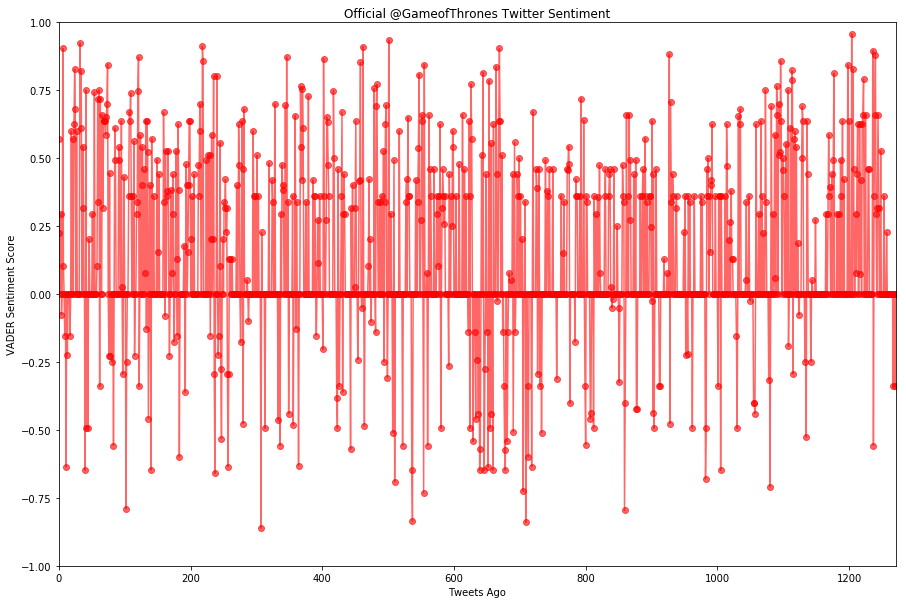

In [79]:
plt.figure(figsize=(15,10))
x_axis = np.arange(len(df))
y_axis = df["Polarity"]
plt.plot(x_axis, y_axis, "ro-", alpha=0.6)
plt.xlim(0, 1271)
plt.ylim(-1, 1)
plt.title("Official @GameofThrones Twitter Sentiment")
plt.xlabel("Tweets Ago")
plt.ylabel("VADER Sentiment Score")
plt.savefig("Images/OfficialTwitterSentiments.png")
plt.show()

In [11]:
seasonstartid = df.iloc[302]["Id"]
seasonfinishid = df.iloc[118]["Id"]

In [39]:
search_term = "#GameofThrones"
rando_tweets = []
latest_tweet = None
for x in range(10):
    public_tweets = api.search(search_term,
                               count=100,
                               result_type="mixed",
                               max_id=latest_tweet
    )
    for tweet in public_tweets["statuses"]:
        latest_tweet = int(tweet["id_str"])
        result = analyzer.polarity_scores(tweet["text"])
        rando_tweets.append({
            "Text": tweet["text"],
            "Polarity": result["compound"],
            "User Name": tweet["user"]["name"],
            "Created At": tweet["created_at"]
        })
now = datetime.datetime.now()
filenow = str(now)[:-16]

In [40]:
tweet_df = pd.DataFrame(rando_tweets)
tweet_df.head()

,Created At,Polarity,Text,User Name
0,Wed Mar 14 23:45:00 +0000 2018,-0.7650,Sean Bean revealed Ned Stark was “just saying ...,IndieWire
1,Wed Mar 14 20:30:01 +0000 2018,0.0000,#GameOfThrones: Sean Bean finally reveals what...,IGN
2,Thu Mar 15 17:10:00 +0000 2018,0.0000,"MEDO! Francesca Orsi, executiva da HBO, contou...",Federico Devito
3,Fri Mar 16 03:54:41 +0000 2018,0.1124,RT @THR: The erstwhile Jorah Mormont is cautio...,Ram
4,Fri Mar 16 03:54:25 +0000 2018,0.3108,RT @majtague: LOL SHANGELA THOUGHT SHE WAS DAN...,bicurious george


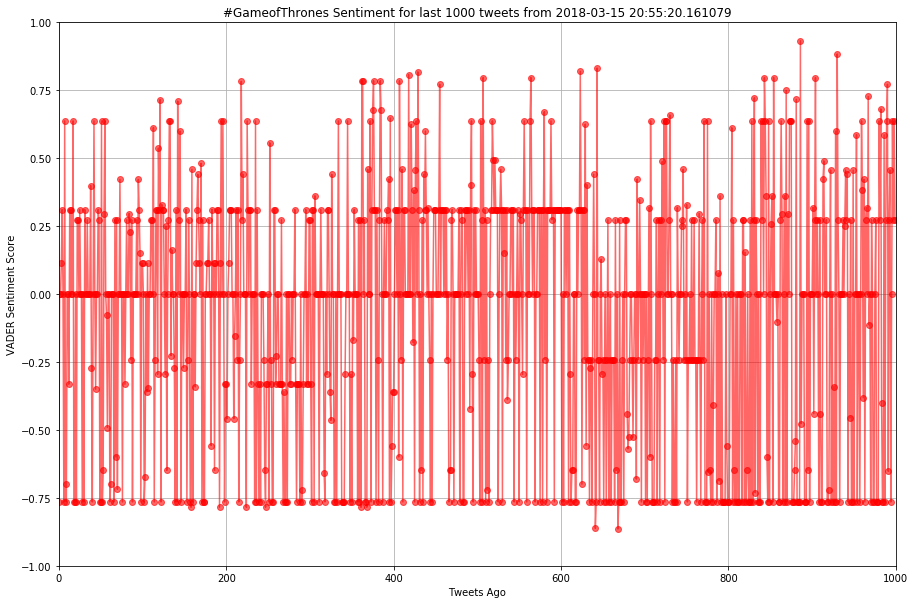

In [81]:
plt.figure(figsize=(15,10))
x_axis = np.arange(len(tweet_df["Polarity"]))
y_axis = pd.to_numeric(tweet_df["Polarity"])
plt.plot(x_axis, y_axis, "ro-", alpha=0.6)
plt.grid(True)
plt.xlabel("Tweets Ago")
plt.ylabel("VADER Sentiment Score")
plt.title(f"{search_term} Sentiment for last 1000 tweets from {now}")
plt.xlim(0, 1000)
plt.ylim(-1, 1)
plt.savefig(f"Images/{search_term}{filenow}.png")
plt.show()

In [57]:
positive_tweets_df = tweet_df.loc[tweet_df["Polarity"] > 0]
negative_tweets_df = tweet_df.loc[tweet_df["Polarity"] < 0]
neutral_tweets_df = tweet_df.loc[tweet_df["Polarity"] == 0]

In [63]:
positive_tweets_df.mean()

Polarity    0.393097
dtype: float64

In [64]:
negative_tweets_df.mean()

Polarity   -0.592941
dtype: float64